In [1]:
# Importing dependencies:
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print('Imported all dependencies!')

Imported all dependencies!


This image is: <class 'numpy.ndarray'> with dimensions: (960, 1280, 3)


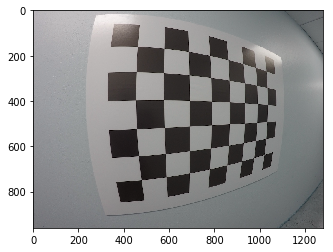

In [2]:
# Opening and reading an image (one provided by Udacity):
image = cv2.imread('calibration_wide/GOPR0032.jpg')

print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

In [3]:
# Setting image size:
# Number of inside corners in X:
nx = 8
# Number of inside corners in Y:
ny = 6

# Creating object points:
# Array that will hold 3D points of the real world:
objpoints = []

# Array that will hold 2D in the image plane:
imagepoints = []

# Preparing the object points:
objp = np.zeros((6 * 8, 3), np.float32)

# Reshaping the coordinates given from ngrid to 2 columns X & Y:
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1, 2)

print('Done setting the arrays and image size!')

Done setting the arrays and image size!


Image saved in directory!


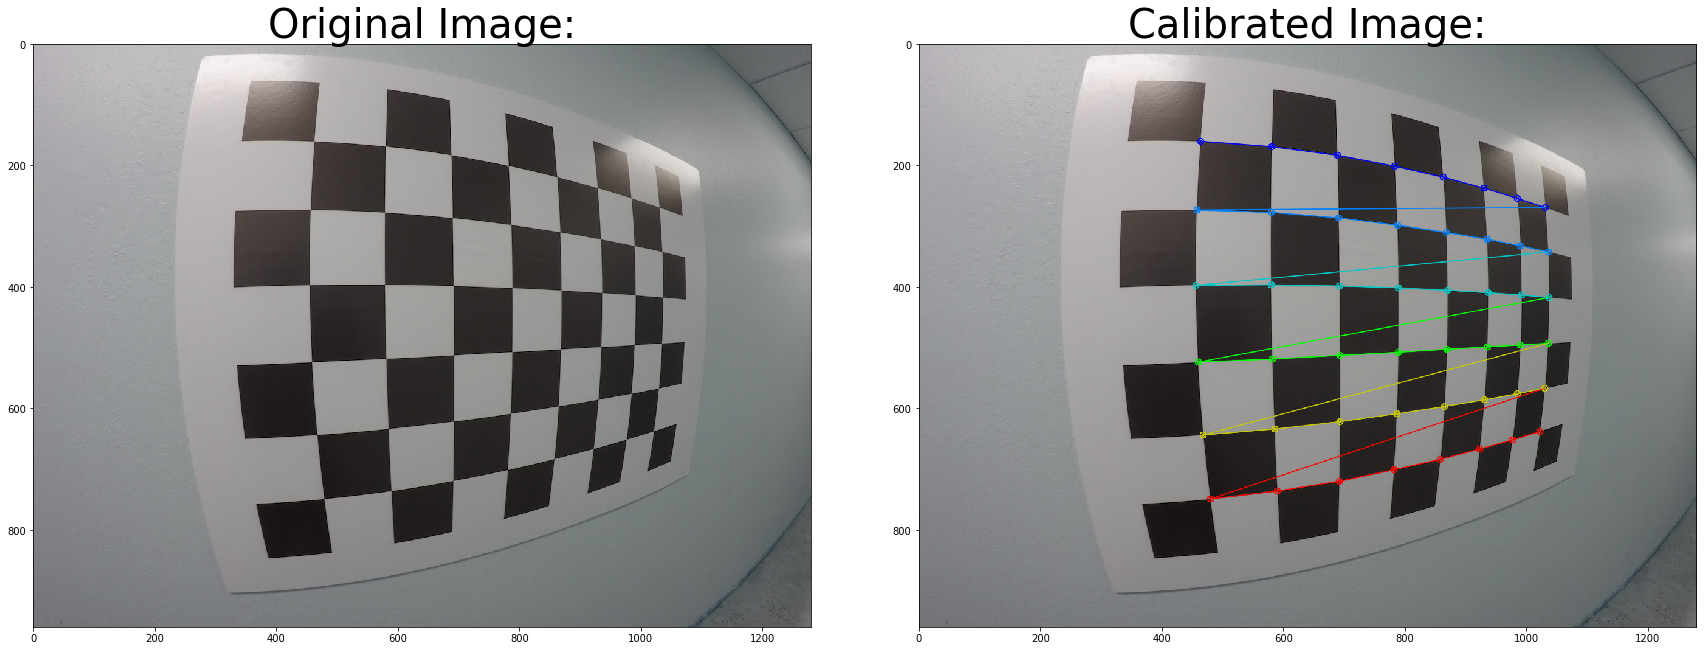

In [4]:
# Creating function that calibrates the camera:
def cal_camera(img, objpoints, imagepoints):
    
    # Grayscaling images from color to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Looking for chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # Drawing detected corners of. the image
    img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    
    # If the function finds corners:
    if ret == True:
        
        # Appending the corners and the object points to the empty arrays created before:
        imagepoints.append(corners)
        objpoints.append(objp)
        
        # Drawing corners on the chessboard:
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        
    return img

# Format of showing the original and calibrated images taken from Udacity:
# Formatting the amount of columns and the size of the images that will be displayed:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

# Showing the original image before passing it through the function:
ax1.imshow(image)
ax1.set_title('Original Image:', fontsize=40)

# Saving the calibrated image in a variable:
calibrated = cal_camera(image, objpoints, imagepoints)
plt.imsave('output_images/calibrated.jpg', calibrated)
print('Image saved in directory!')

# Showing the calibrated picture after passing it through the function:
ax2.imshow(calibrated)
ax2.set_title('Calibrated Image:', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
# Calibrating and undistorting the image demostrasted before:
def corners_unwarp(image, nx, ny, mtx, dst):
    
    # Removing distorting in the image using the cv2.undistort function:
    undistort = cv2.undistort(image, mtx, dst, None, mtx)
    
    # Converting undistorted image to grayscale:
    gray = cv2.cvtColor(image, cv2.Color_RGB2GRAY)
    
    # Finding the corners in the picture:
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), corners, ret)
    
    # If corners are found in the image:
    if ret == True:
        
        # Drawing corners on the chessboard:
        cv2.drawChessboardCorners(undistort, (nx, ny), corners, ret)
        
        # Offset for the dst points:
        offset = 100
        
        # Grabbing the image:
        image_size = (gray.shape[1], gray.shape[0])
        
        # Grabbing outter corners of the image as source points:
        src = np.float32(corners[0], corners[nx - 1], corners[-1], corners[-nx])
        
        # Choosing destination points:
        dst = np.float32([[offset, offset], 
                          [image_size[0] - offset, offset], 
                          [image_size[0] - offset, image_size[1] - offset], 
                          [offset, image_size[1] - offset]])
        
        # Calculating the perspective transform matrix based on source and destination points:
        M = cv2.getPerspectiveTransform(src, dst)
        
        # Warping the image using the warpPerspective function:
        warped = cv2.warpgetPerspectiveTransform(undistort, M, image_size)
        
    # Returning the warped image
    return warped, M

print('Function ready to use!')

In [ ]:
top_down, perspective_M = corners_unwarp(image, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)